In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,NaN,NaN
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,NaN,NaN
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,NaN,NaN
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,NaN,NaN


In [2]:
column_names = {'X1':'Relative_Compactness', 'X2':'Surface_Area', 'X3':'Wall_Area','X4':'Roof_Area', 'X5':'Overall_Height', 'X6':'Orientation', 'X7':'Glazing_Area', 'X8':'Glazing_Area_Distribution','Y1':'Heating_Load', 'Y2':'Cooling_Load'}
new_data = data.rename(columns = column_names )
new_data

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,NaN,NaN
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,NaN,NaN
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,NaN,NaN
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,NaN,NaN


In [3]:
new_data.isnull().sum()

Relative_Compactness           0
Surface_Area                   0
Wall_Area                      0
Roof_Area                      0
Overall_Height                 0
Orientation                    0
Glazing_Area                   0
Glazing_Area_Distribution      0
Heating_Load                   0
Cooling_Load                   0
Unnamed: 10                  768
Unnamed: 11                  768
dtype: int64

In [4]:
new_data.dropna(axis=1, how = "all", inplace = True)

In [5]:
new_data.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [6]:
new_data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

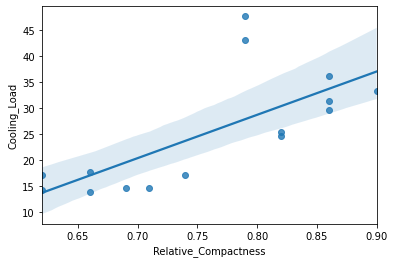

In [7]:
simple_linear_reg_df = new_data[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data = simple_linear_reg_df)

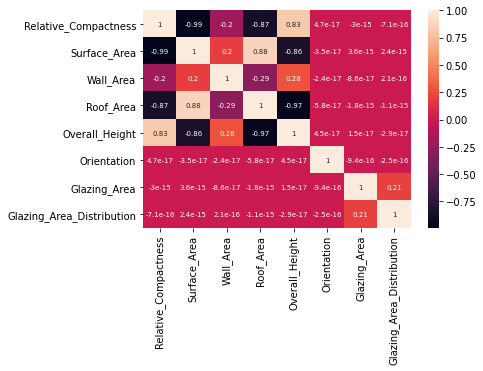

In [8]:
hm = new_data[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution']].corr()
g = sns.heatmap(hm, annot=True, annot_kws={'size':7})

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(new_data)
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [11]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.intercept_)


0.6579557962269089


In [12]:
print(regressor.coef_)

[-0.60641248 -0.23502219  0.01894652 -0.32809911  0.39354906  0.00339895
  0.21504176  0.0284522 ]


In [13]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)
print(y_pred)

[0.19171335 0.57861912 0.73990043 0.71445968 0.75810474 0.24871954
 0.16921186 0.60311106 0.24501095 0.54737107 0.31823959 0.65925977
 0.69331771 0.30343424 0.19027072 0.71785863 0.57207665 0.3159481
 0.26210611 0.74693205 0.69900815 0.06941108 0.60925257 0.3270687
 0.21248809 0.74445789 0.33479036 0.18715589 0.80079078 0.27003867
 0.67806128 0.73420999 0.14215292 0.28571674 0.5633094  0.8076142
 0.33505064 0.1353295  0.72354907 0.24727691 0.82414823 0.15809126
 0.11176667 0.16578739 0.117612   0.15327352 0.48452124 0.68989323
 0.75354728 0.72015012 0.10167366 0.66495022 0.09850946 0.25072523
 0.76371047 0.76826793 0.73647596 0.62801172 0.15118472 0.29887678
 0.19284633 0.59447275 0.60356213 0.76484345 0.5686777  0.92641767
 0.68193683 0.31937257 0.66950767 0.23759893 0.54397212 0.25185821
 0.23182538 0.72232476 0.28684972 0.68405669 0.63825962 0.74124161
 0.25641567 0.53042681 0.13419651 0.64395006 0.26182199 0.75688705
 0.23751582 0.90252292 0.91959424 0.82870569 0.25984014 0.1811813

In [15]:
y_pred.shape

(231,)

In [16]:
y_test

285    0.181451
101    0.638177
581    0.823942
352    0.877865
726    0.774063
         ...   
241    0.493934
599    0.927743
650    0.218118
11     0.331626
214    0.730116
Name: Heating_Load, Length: 231, dtype: float64

In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.06296742865143842


In [19]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.007864466886183719


In [20]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.08868182951531683


In [21]:
print('r2_score:', metrics.r2_score(y_test, y_pred))

r2_score: 0.8938550769308062
